In [61]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#**1. Loading and Preprocessing**


---



In [2]:
file=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [3]:
carprice_df=pd.read_csv('CarPrice_Assignment.csv')
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Shape of dataset
print(f"\n Dataset Shape: {carprice_df.shape}")


 Dataset Shape: (205, 26)


In [5]:
# Basic Information
print("\n🔹 Dataset Info:")
print(carprice_df.info())



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-n

In [6]:
# Statistical summary
print("\n Statistical Summary:\n")
display(carprice_df.describe())


 Statistical Summary:



,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Check for missing values
print("\n Missing Values:\n")
print(carprice_df.isnull().sum())


 Missing Values:

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [8]:
#Check for duplicate

duplicate_rows=carprice_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [9]:
#drop unwanted column
carprice_df.drop(["car_ID","CarName"], axis=1, inplace=True)

In [10]:
# Column names
print("\n Columns:\n")
print(carprice_df.columns.tolist())


 Columns:

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [11]:
# Finding outliers and handle it
num_cols=carprice_df.select_dtypes(include=['int64','float64']).columns.drop("price")

# find the Q1, Q2, Q3 and IQR for numerical columns
Q1=carprice_df[num_cols].quantile(0.25)
Q2=carprice_df[num_cols].quantile(0.50)
Q3=carprice_df[num_cols].quantile(0.75)
IQR=Q3-Q1

outlier_counts = {}
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = carprice_df[(carprice_df[col] < lower_bound) | (carprice_df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)



# Convert dictionary to DataFrame
outlier_summary = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])


# Display table
outlier_summary

,Feature,Outlier Count
0,symboling,0
1,wheelbase,3
2,carlength,1
3,carwidth,8
4,carheight,0
5,curbweight,0
6,enginesize,10
7,boreratio,0
8,stroke,20
9,compressionratio,28


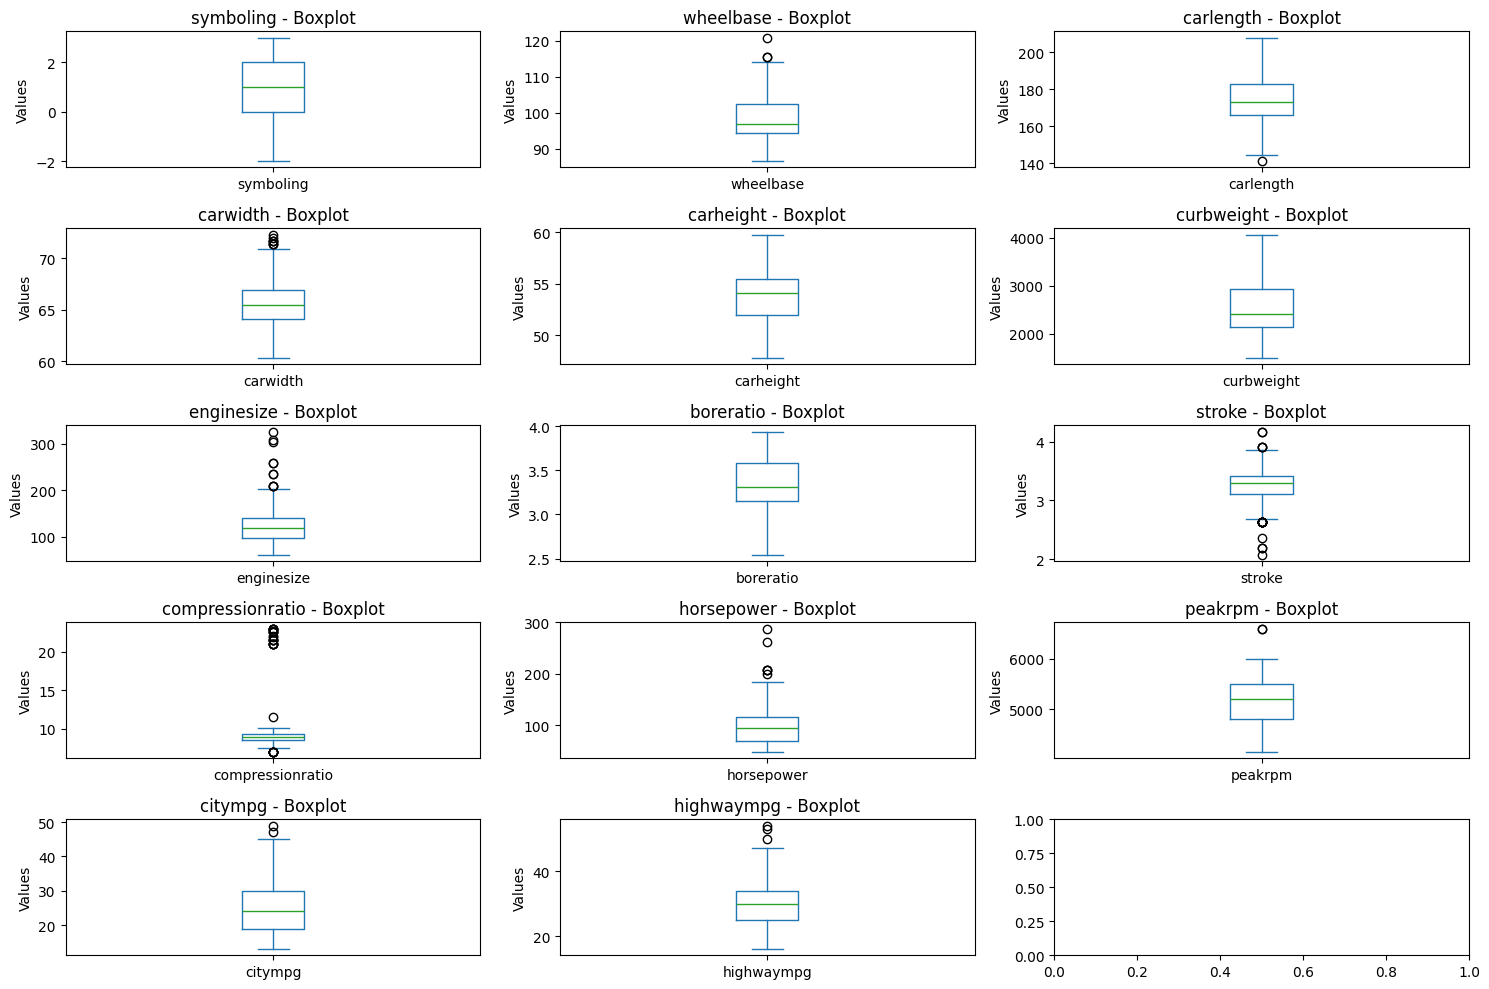

In [12]:
# Visualize outliers
fig, axes = plt.subplots(5, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    carprice_df[col].plot(kind='box', ax=axes[i], title=f'{col} - Boxplot')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [13]:
df_clipped = carprice_df.copy()
outlier_aftercapping_counts = {}
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_clipped[col] = carprice_df[col].clip(lower=lower_bound, upper=upper_bound)
    outliers_clipped = df_clipped[(df_clipped[col] < lower_bound) | (df_clipped[col] > upper_bound)]
    outlier_aftercapping_counts[col] = len(outliers_clipped)


# Convert dictionary to DataFrame
outlier_aftercapping_summary = pd.DataFrame(list(outlier_aftercapping_counts.items()), columns=['Feature', 'Outlier Count'])


# Display table
outlier_aftercapping_summary

,Feature,Outlier Count
0,symboling,0
1,wheelbase,0
2,carlength,0
3,carwidth,0
4,carheight,0
5,curbweight,0
6,enginesize,0
7,boreratio,0
8,stroke,0
9,compressionratio,0


In [14]:
#checking for categorical value to check whether encoding is needed.
cat_cols=df_clipped.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


In [15]:
label_cols = ["enginetype", "cylindernumber", "fuelsystem"]

le = LabelEncoder()

for col in label_cols:
    df_clipped[col] = le.fit_transform(df_clipped[col])


In [16]:
onehot_cols = ["fueltype", "aspiration", "doornumber",
               "carbody", "drivewheel", "enginelocation"]

df_clipped = pd.get_dummies(df_clipped, columns=onehot_cols, drop_first=True,dtype=int)

In [17]:
df_clipped.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,3,88.6,168.8,64.1,48.8,2548,0,2,130,5,...,1,0,1,0,0,0,0,0,1,0
1,3,88.6,168.8,64.1,48.8,2548,0,2,130,5,...,1,0,1,0,0,0,0,0,1,0
2,1,94.5,171.2,65.5,52.4,2823,5,3,152,5,...,1,0,1,0,1,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,3,2,109,5,...,1,0,0,0,0,1,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,3,1,136,5,...,1,0,0,0,0,1,0,0,0,0


In [18]:
X = df_clipped.drop("price", axis=1)
y = df_clipped["price"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**2. Model Implementation**


---



In [76]:
models = {
   'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    results[name] = {
        "R2_Score": r2_score(y_test, pred),
        "MSE": mean_squared_error(y_test, pred),
        "MAE": mean_absolute_error(y_test, pred)
    }

results_df = pd.DataFrame(results).T
results_df.sort_values('R2_Score', ascending=False)



,R2_Score,MSE,MAE
Random Forest,0.960695,3.102928e+06,1248.256069
Decision Tree,0.904647,7.527566e+06,1895.479683
Linear Regression,0.795635,1.613338e+07,2708.394790


#**3. Model Evaluation**


---



In [44]:
best_model_r2 = results_df['R2_Score'].idxmax()
best_mse_model = results_df['MSE'].idxmin()
best_mae_model = results_df['MAE'].idxmin()

print(f"BEST PERFORMING MODEL: {best_model_r2}\n")
print(f"R2 Score: {results_df.loc[best_model_r2, 'R2_Score']:.4f}")
print(f"MSE: {results_df.loc[best_mse_model, 'MSE']:.2f}")
print(f"MAE: {results_df.loc[best_mae_model, 'MAE']:.2f}")

BEST PERFORMING MODEL: Random Forest

R2 Score: 0.9607
MSE: 3102927.53
MAE: 1248.26


###**KEY INSIGHT:**

Random Forest is the best because:

• It can handle complex car price patterns

• It's accurate (96% correct)

• It's reliable for business decisions
*italicised text*
• It works well with car data

#**4. Feature Importance Analysis**


---



In [73]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature Importance
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
importance.head(10)


,0
enginesize,0.556455
curbweight,0.293305
highwaympg,0.047394
horsepower,0.028441
carwidth,0.013014
carlength,0.009069
wheelbase,0.007503
citympg,0.007151
peakrpm,0.006402
boreratio,0.006033


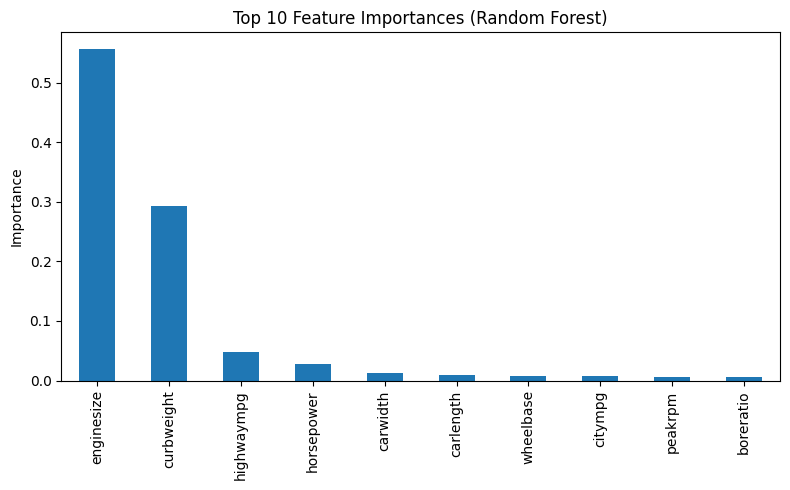

In [78]:
# Plot top 10
plt.figure(figsize=(8,5))
importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [74]:

print("SIGNIFICANT VARIABLES IDENTIFIED:")


# Get top 5 feature names
top_5_features = importance.head(5).index.tolist()

for i, feature in enumerate(top_5_features, 1):
    print(f"{feature}")

print("\nThese top 5 features explain most of the car price variation.")

SIGNIFICANT VARIABLES IDENTIFIED:
enginesize
curbweight
highwaympg
horsepower
carwidth

These top 5 features explain most of the car price variation.


#**5. Hyperparameter Tuning**



---



In [68]:
param_grid = {
  'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

grid.best_params_, grid.best_score_

({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 np.float64(0.8889229617881572))

In [72]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

print(f"Tuned R2: {r2_score(y_test, y_pred):.6f}")
print(f"Tuned MSE: {mean_squared_error(y_test, y_pred):.6e}")
print(f"Tuned MAE: {mean_absolute_error(y_test, y_pred):.6f}")

Tuned R2: 0.959715
Tuned MSE: 3.180255e+06
Tuned MAE: 1189.313992


###**CONCLUSION:**
• Overall performance got slightly decreased(0.9607 -> 0.959715)

• But predictions became more consistent (lower MAE, 1248.26 -> 1189.313992)

• Tuning didn't improve the model